In [5]:
## import torch
import torchvision
import torch
import torchvision.datasets as datasets
import torch.nn as nn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
from torch.nn import functional as F

In [6]:
#############################################################################################################
###
# PYTORCH DOCUMENTATION EXAMPLE
# TUTORIAL USED: #https://github.com/MorvanZhou/PyTorch-Tutorial/blob/master/tutorial-contents/404_autoencoder.py
###
#### HYPER PARAMS
LR = 0.0005         # learning rate
N_TEST_IMG = 5

class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        ###########################
        #What is this used for?
        #self.map = {}
        ###########################
        self.fc4 = nn.Linear(2, 784)

        
    def decode(self, z):
        out=self.fc4(z)
        return torch.sigmoid(out)
    
    def forward(self, x):
        encoded = x
        #decoded= x
        decoded = self.decode(encoded)
        return encoded, decoded
    
    
### INITALIZE MODEL PARAMS
model = Decoder()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)


def loss_function(recon_x, x):
    BCE = F.binary_cross_entropy(recon_x, x, reduction='sum')
    return(BCE)
def decode_loader(data, batch_size):
    perm = torch.randperm(data.size(0))
    idx = perm[:batch_size]
    batch=data[idx]
    return(batch)


## CUSTOM DATA LOADER
from torch.utils.data.dataset import Dataset
class rgenData(Dataset):
    def __init__(self, randEnc, x, transform=None):
        self.randEnc= randEnc
        self.x=x 
    def __len__(self):
        z=self.x.shape[0]
        return  z
    def __getitem__(self, idx):
        randEnc=self.randEnc[idx]
        x=self.x[idx]
        return randEnc, x

# Generate Train Data

## Pull in MNIST Data

In [7]:
#####################
## IMPORT MNIST DATA SET
batch_size_loader=100000
data_loader = torch.utils.data.DataLoader(
                            torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.ToTensor()),batch_size=batch_size_loader, shuffle=True)
examples = enumerate(data_loader)
batch_idx, (example_data, example_targets) = next(examples)
example_data.shape

torch.Size([60000, 1, 28, 28])

## Pull Training Images and Generate training tensors
###  Ω = randomlt generated vector in R2
###  Iteration= one pass through Decode
### RandEnc= a tensor containing the desired number of iterations of Ω 

In [12]:
found=False
i=0
cnt_0=0
cnt_1=0
onecnt=0
zerocnt=10

while found==False:
    target=example_targets[i]
    if cnt_0==zerocnt and cnt_1==onecnt:
        found=True
    else:
        datum=example_data[i].view(-1,28*28)
        if (target==1 and cnt_1<onecnt and onecnt!=0):
            if cnt_0==0 and cnt_1==0:
                x_tensor=datum
                omega=torch.rand(1, 2)
                randEnc_tensor=omega
                cnt_1+=1
                print('CNT_1')
                print(cnt_1)
            else:
                omega=torch.rand(1, 2)
                print(omega)
                x_tensor=torch.cat((x_tensor,datum),0)
                randEnc_tensor=torch.cat((randEnc_tensor,omega),0)
                cnt_1+=1
        if (target==0 and cnt_0<zerocnt and zerocnt!=0):
            if  cnt_0==0 and cnt_1==0:
                x_tensor=datum
                omega=torch.rand(1, 2)
                randEnc_tensor=omega
                cnt_0+=1
            else:
                omega=torch.rand(1, 2)
                x_tensor=torch.cat((x_tensor,datum),0)
                randEnc_tensor=torch.cat((randEnc_tensor,omega),0)
                cnt_0+=1
    i+=1
data_10zero = rgenData(randEnc_tensor, x_tensor)

In [11]:
found=False
i=0
cnt_0=0
cnt_1=0
onecnt=0
zerocnt=25

while found==False:
    target=example_targets[i]
    if cnt_0==zerocnt and cnt_1==onecnt:
        found=True
    else:
        datum=example_data[i].view(-1,28*28)
        if (target==1 and cnt_1<onecnt and onecnt!=0):
            if cnt_0==0 and cnt_1==0:
                x_tensor=datum
                omega=torch.rand(1, 2)
                randEnc_tensor=omega
                cnt_1+=1
                print('CNT_1')
                print(cnt_1)
            else:
                omega=torch.rand(1, 2)
                print(omega)
                x_tensor=torch.cat((x_tensor,datum),0)
                randEnc_tensor=torch.cat((randEnc_tensor,omega),0)
                cnt_1+=1
        if (target==0 and cnt_0<zerocnt and zerocnt!=0):
            if  cnt_0==0 and cnt_1==0:
                x_tensor=datum
                omega=torch.rand(1, 2)
                randEnc_tensor=omega
                cnt_0+=1
            else:
                omega=torch.rand(1, 2)
                x_tensor=torch.cat((x_tensor,datum),0)
                randEnc_tensor=torch.cat((randEnc_tensor,omega),0)
                cnt_0+=1
    i+=1
data_25zero = rgenData(randEnc_tensor, x_tensor)

In [30]:
found=False
i=0
cnt_0=0
cnt_1=0
onecnt=0
zerocnt=50

while found==False:
    target=example_targets[i]
    if cnt_0==zerocnt and cnt_1==onecnt:
        found=True
    else:
        datum=example_data[i].view(-1,28*28)
        if (target==1 and cnt_1<onecnt and onecnt!=0):
            if cnt_0==0 and cnt_1==0:
                x_tensor=datum
                omega=torch.rand(1, 2)
                randEnc_tensor=omega
                cnt_1+=1
            else:
                omega=torch.rand(1, 2)
                print(omega)
                x_tensor=torch.cat((x_tensor,datum),0)
                randEnc_tensor=torch.cat((randEnc_tensor,omega),0)
                cnt_1+=1
        if (target==0 and cnt_0<zerocnt and zerocnt!=0):
            if  cnt_0==0 and cnt_1==0:
                x_tensor=datum
                omega=torch.rand(1, 2)
                randEnc_tensor=omega
                cnt_0+=1
            else:
                omega=torch.rand(1, 2)
                x_tensor=torch.cat((x_tensor,datum),0)
                randEnc_tensor=torch.cat((randEnc_tensor,omega),0)
                cnt_0+=1
    i+=1
data_50zero  = rgenData(randEnc_tensor, x_tensor)

In [32]:
found=False
i=0
cnt_0=0
cnt_1=0
onecnt=0
zerocnt=75

while found==False:
    target=example_targets[i]
    if cnt_0==zerocnt and cnt_1==onecnt:
        found=True
    else:
        datum=example_data[i].view(-1,28*28)
        if (target==1 and cnt_1<onecnt and onecnt!=0):
            if cnt_0==0 and cnt_1==0:
                x_tensor=datum
                omega=torch.rand(1, 2)
                randEnc_tensor=omega
                cnt_1+=1
            else:
                omega=torch.rand(1, 2)
                print(omega)
                x_tensor=torch.cat((x_tensor,datum),0)
                randEnc_tensor=torch.cat((randEnc_tensor,omega),0)
                cnt_1+=1
        if (target==0 and cnt_0<zerocnt and zerocnt!=0):
            if  cnt_0==0 and cnt_1==0:
                x_tensor=datum
                omega=torch.rand(1, 2)
                randEnc_tensor=omega
                cnt_0+=1
            else:
                omega=torch.rand(1, 2)
                x_tensor=torch.cat((x_tensor,datum),0)
                randEnc_tensor=torch.cat((randEnc_tensor,omega),0)
                cnt_0+=1
    i+=1
data_75zero  = rgenData(randEnc_tensor, x_tensor)

In [33]:
found=False
i=0
cnt_0=0
cnt_1=0
onecnt=0
zerocnt=100

while found==False:
    target=example_targets[i]
    if cnt_0==zerocnt and cnt_1==onecnt:
        found=True
    else:
        datum=example_data[i].view(-1,28*28)
        if (target==1 and cnt_1<onecnt and onecnt!=0):
            if cnt_0==0 and cnt_1==0:
                x_tensor=datum
                omega=torch.rand(1, 2)
                randEnc_tensor=omega
                cnt_1+=1
            else:
                omega=torch.rand(1, 2)
                print(omega)
                x_tensor=torch.cat((x_tensor,datum),0)
                randEnc_tensor=torch.cat((randEnc_tensor,omega),0)
                cnt_1+=1
        if (target==0 and cnt_0<zerocnt and zerocnt!=0):
            if  cnt_0==0 and cnt_1==0:
                x_tensor=datum
                omega=torch.rand(1, 2)
                randEnc_tensor=omega
                cnt_0+=1
            else:
                omega=torch.rand(1, 2)
                x_tensor=torch.cat((x_tensor,datum),0)
                randEnc_tensor=torch.cat((randEnc_tensor,omega),0)
                cnt_0+=1
    i+=1
data_100zero  = rgenData(randEnc_tensor, x_tensor)

In [51]:
found=False
i=0
cnt_0=0
cnt_1=0
onecnt=0
zerocnt=1000

while found==False:
    target=example_targets[i]
    if cnt_0==zerocnt and cnt_1==onecnt:
        found=True
    else:
        datum=example_data[i].view(-1,28*28)
        if (target==1 and cnt_1<onecnt and onecnt!=0):
            if cnt_0==0 and cnt_1==0:
                x_tensor=datum
                omega=torch.rand(1, 2)
                randEnc_tensor=omega
                cnt_1+=1
            else:
                omega=torch.rand(1, 2)
                print(omega)
                x_tensor=torch.cat((x_tensor,datum),0)
                randEnc_tensor=torch.cat((randEnc_tensor,omega),0)
                cnt_1+=1
        if (target==0 and cnt_0<zerocnt and zerocnt!=0):
            if  cnt_0==0 and cnt_1==0:
                x_tensor=datum
                omega=torch.rand(1, 2)
                randEnc_tensor=omega
                cnt_0+=1
            else:
                omega=torch.rand(1, 2)
                x_tensor=torch.cat((x_tensor,datum),0)
                randEnc_tensor=torch.cat((randEnc_tensor,omega),0)
                cnt_0+=1
    i+=1
data_1kzero  = rgenData(randEnc_tensor, x_tensor)

## Run Model

In [13]:
def train_e(epoch, log_interval=10):
    model.train()
    train_loss = 0
    optimizer.zero_grad()
    lossvec=[]
    lossvec_cnt=[]
    cnt=0
    for i in range(1, epoch):
        for batch_idx, (randEnc, x) in enumerate(train_loader):
            cnt+=1
            encoded, decoded = model(randEnc)
            loss = loss_function(decoded, x)
            loss.backward()
            train_loss += loss.item()
            optimizer.step()
            '''
            if batch_idx % log_interval == 0:
                print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    i, batch_idx * len(x), len(train_loader.dataset),
                    100. * batch_idx / len(train_loader),
                    loss.item() / len(x)))
            '''
        lossvec.append(train_loss / (len(train_loader.dataset)*i))
        lossvec_cnt.append(i)
        
    return (lossvec, lossvec_cnt)

Text(0.5,0.98,'Sample Size: 10 /  Epoch Size: 10000 /  Min Error:186')

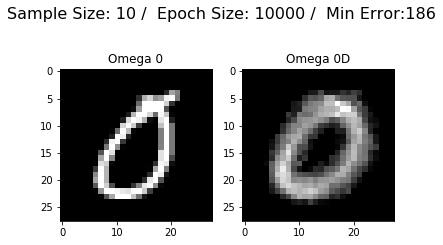

In [39]:
batch_size=10
EPOCH=10000
train_loader=torch.utils.data.DataLoader(
    data_10zero, batch_size=batch_size, shuffle=False)
model = Decoder()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

lossvec_10zero, lossvec_cnt_10zero=train_e(EPOCH) 

minerror=round(lossvec_10zero[EPOCH-2])
f,(ax1, ax2) = plt.subplots(1,2)
ax1.set_title('Omega 0')
ax1.imshow(tensor0.detach().numpy(),cmap='gray')
ax2.set_title('Omega 0D')
ax2.imshow(tensor_d0.detach().numpy(),cmap='gray')
val='Sample Size: '+str(batch_size)+' / '+' Epoch Size: '+str(EPOCH)+' / '+ ' Min Error:'+str(minerror) 
f.suptitle(val, fontsize=16)

Text(0.5,0.98,'Sample Size: 25 /  Epoch Size: 10000 /  Min Error:222')

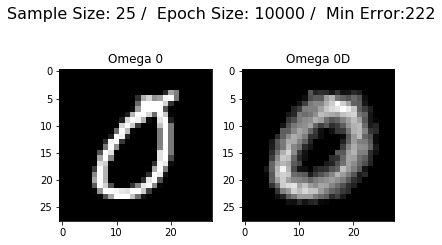

In [40]:
batch_size=25
EPOCH=10000
train_loader=torch.utils.data.DataLoader(
    data_25zero, batch_size=batch_size, shuffle=False)
model = Decoder()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

lossvec_25zero, lossvec_cnt_25zero=train_e(EPOCH) 

tensor0=data_25zero[0][1].view(28,28)
tensor_d0=model.decode(data_25zero[0][0])
tensor_d0=tensor_d0.view(28,28)

minerror=round(lossvec_25zero[EPOCH-2])
f,(ax1, ax2) = plt.subplots(1,2)
ax1.set_title('Omega 0')
ax1.imshow(tensor0.detach().numpy(),cmap='gray')
ax2.set_title('Omega 0D')
ax2.imshow(tensor_d0.detach().numpy(),cmap='gray')
val='Sample Size: '+str(batch_size)+' / '+' Epoch Size: '+str(EPOCH)+' / '+ ' Min Error:'+str(minerror) 
f.suptitle(val, fontsize=16)

Text(0.5,0.98,'Sample Size: 50 /  Epoch Size: 10000 /  Min Error:237')

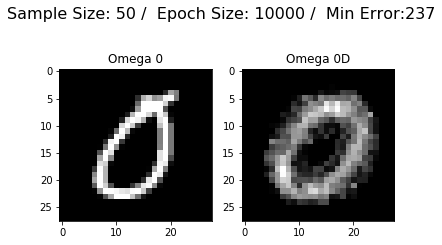

In [44]:
batch_size=50
EPOCH=10000
train_loader=torch.utils.data.DataLoader(
    data_50zero, batch_size=batch_size, shuffle=False)
model = Decoder()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

lossvec_50zero, lossvec_cnt_50zero=train_e(EPOCH) 

tensor0=data_50zero[0][1].view(28,28)
tensor_d0=model.decode(data_50zero[0][0])
tensor_d0=tensor_d0.view(28,28)

minerror=round(lossvec_50zero[EPOCH-2])
f,(ax1, ax2) = plt.subplots(1,2)
ax1.set_title('Omega 0')
ax1.imshow(tensor0.detach().numpy(),cmap='gray')
ax2.set_title('Omega 0D')
ax2.imshow(tensor_d0.detach().numpy(),cmap='gray')
val='Sample Size: '+str(batch_size)+' / '+' Epoch Size: '+str(EPOCH)+' / '+ ' Min Error:'+str(minerror) 
f.suptitle(val, fontsize=16)

Text(0.5,0.98,'Sample Size: 75 /  Epoch Size: 10000 /  Min Error:244')

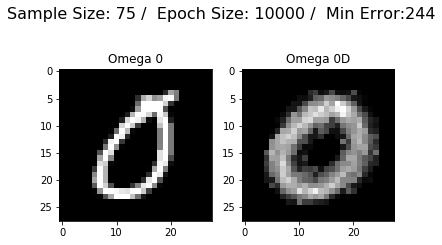

In [45]:
batch_size=75
EPOCH=10000
train_loader=torch.utils.data.DataLoader(
    data_75zero, batch_size=batch_size, shuffle=False)
model = Decoder()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

lossvec_75zero, lossvec_cnt_75zero=train_e(EPOCH) 

tensor0=data_75zero[0][1].view(28,28)
tensor_d0=model.decode(data_75zero[0][0])
tensor_d0=tensor_d0.view(28,28)

minerror=round(lossvec_75zero[EPOCH-2])
f,(ax1, ax2) = plt.subplots(1,2)
ax1.set_title('Omega 0')
ax1.imshow(tensor0.detach().numpy(),cmap='gray')
ax2.set_title('Omega 0D')
ax2.imshow(tensor_d0.detach().numpy(),cmap='gray')
val='Sample Size: '+str(batch_size)+' / '+' Epoch Size: '+str(EPOCH)+' / '+ ' Min Error:'+str(minerror) 
f.suptitle(val, fontsize=16)

Text(0.5,0.98,'Sample Size: 100 /  Epoch Size: 10000 /  Min Error:243')

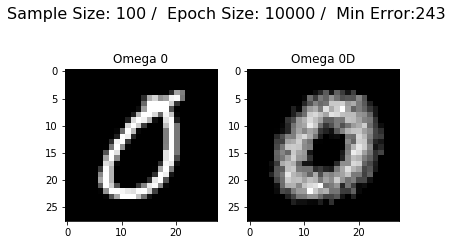

In [46]:
batch_size=100
EPOCH=10000
train_loader=torch.utils.data.DataLoader(
    data_100zero, batch_size=batch_size, shuffle=False)
model = Decoder()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

lossvec_100zero, lossvec_cnt_100zero=train_e(EPOCH) 

tensor0=data_100zero[0][1].view(28,28)
tensor_d0=model.decode(data_100zero[0][0])
tensor_d0=tensor_d0.view(28,28)

minerror=round(lossvec_100zero[EPOCH-2])
f,(ax1, ax2) = plt.subplots(1,2)
ax1.set_title('Omega 0')
ax1.imshow(tensor0.detach().numpy(),cmap='gray')
ax2.set_title('Omega 0D')
ax2.imshow(tensor_d0.detach().numpy(),cmap='gray')
val='Sample Size: '+str(batch_size)+' / '+' Epoch Size: '+str(EPOCH)+' / '+ ' Min Error:'+str(minerror) 
f.suptitle(val, fontsize=16)

Text(0.5,0.98,'Sample Size: 1000 /  Epoch Size: 10000 /  Min Error:243')

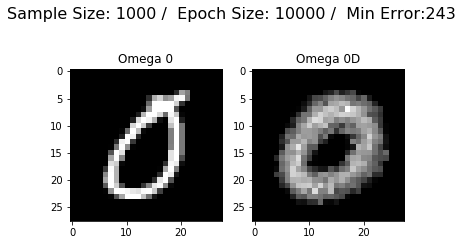

In [52]:
batch_size=1000
EPOCH=10000
train_loader=torch.utils.data.DataLoader(
    data_100zero, batch_size=batch_size, shuffle=False)
model = Decoder()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

lossvec_1kzero, lossvec_cnt_1kzero=train_e(EPOCH) 

tensor0=data_1kzero[0][1].view(28,28)
tensor_d0=model.decode(data_1kzero[0][0])
tensor_d0=tensor_d0.view(28,28)

minerror=round(lossvec_100zero[EPOCH-2])
f,(ax1, ax2) = plt.subplots(1,2)
ax1.set_title('Omega 0')
ax1.imshow(tensor0.detach().numpy(),cmap='gray')
ax2.set_title('Omega 0D')
ax2.imshow(tensor_d0.detach().numpy(),cmap='gray')
val='Sample Size: '+str(batch_size)+' / '+' Epoch Size: '+str(EPOCH)+' / '+ ' Min Error:'+str(minerror) 
f.suptitle(val, fontsize=16)

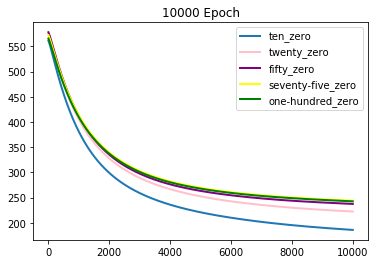

In [50]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Data
df=pd.DataFrame({'x': lossvec_cnt_100zero, 'ten_zero': np.asarray(lossvec_10zero), 'twenty_zero': np.asarray(lossvec_25zero), 
                 'fifty_zero': np.asarray(lossvec_50zero), 'seventy-five_zero': np.asarray(lossvec_75zero), 'one-hundred_zero': np.asarray(lossvec_100zero) })
 
# multiple line plot
plt.plot( 'x', 'ten_zero', data=df, marker='', markerfacecolor='blue', linewidth=2)
plt.plot( 'x', 'twenty_zero', data=df, marker='', color='pink', linewidth=2)
plt.plot( 'x', 'fifty_zero', data=df, marker='', color='purple', linewidth=2)
plt.plot( 'x', 'seventy-five_zero', data=df, marker='', color='yellow', linewidth=2)
plt.plot( 'x', 'one-hundred_zero', data=df, marker='', color='green', linewidth=2)
plt.title('10000 Epoch')
plt.legend()

